In [2]:
#import libraries
import pandas as pd         # data manipulation & analysis
import numpy as np          # numerical & mathematical operations
import matplotlib.pyplot as plt         # for creating visualisations
import seaborn as  sns          # for more advanced visualisations 

In [3]:
#reading data into dataframe
df = pd.read_csv('C:/Users/kohme/Downloads/DAC/Retail_Store.csv' , encoding='latin-1')

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
# checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
#check for missing data
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [7]:
#checking for duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 53)


In [8]:
# dropping data not interested due to irrelevency
# refined dropped columns after analysing heatmap
df = df.drop(columns=['Order Zipcode', 'Product Description', 'Customer Email', 'Customer Password', 'Product Image', 'Product Status', 'Customer Fname', 'Customer Lname', 'Order Id', 'Order Item Id', 'Customer Zipcode', 'Order Item Cardprod Id', 'Latitude', 'Longitude'])

In [9]:
# extracting useful data from dates
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month


In [39]:
# Check the unique years in the dataset to confirm 2018 is present
print("Unique Years in Dataset:", df['year'].unique())

# Drop rows where 'year' is 2018
df_filtered = df[df['year'] != 2018]

# Verify the data after filtering
print(f"Original Dataset Shape: {df.shape}")
print(f"Filtered Dataset Shape (2018 dropped): {df_filtered.shape}")

# Preview the filtered dataset
print(df_filtered.head())


Unique Years in Dataset: [2018 2016 2015 2017]
Original Dataset Shape: (180519, 44)
Filtered Dataset Shape (2018 dropped): (178396, 44)
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
48  PAYMENT                         5                              2   
49  PAYMENT                         2                              2   
50  PAYMENT                         6                              2   
51  PAYMENT                         2                              2   
52  PAYMENT                         3                              2   

    Benefit per order  Sales per customer   Delivery Status  \
48         -30.750000          115.180000     Late delivery   
49        -122.730003           79.180000  Shipping on time   
50          33.599998           96.000000     Late delivery   
51          24.690001           75.980003  Shipping on time   
52           9.100000           91.000000     Late delivery   

    Late_delivery_risk  Category Id    Category Name

In [10]:
# obtaining delivery_delay data to analyse how late delivery might affect losses
df['shipping_date'] = pd.to_datetime(df['shipping date (DateOrders)'])
df['delivery_delay'] = (df['shipping_date'] - df['order_date']).dt.days


In [40]:
# time-based sales data
monthly_sales = df_filtered.groupby('month')['Sales'].sum()
monthly_sales

# best sales: january
# worst sales: december


month
1     3.127596e+06
2     2.888088e+06
3     3.125112e+06
4     3.053996e+06
5     3.185364e+06
6     3.059152e+06
7     3.188170e+06
8     3.187032e+06
9     3.164511e+06
10    3.171279e+06
11    2.703625e+06
12    2.599160e+06
Name: Sales, dtype: float64

In [41]:
yearly_sales = df_filtered.groupby('year')['Sales'].sum()
yearly_sales

# might be incomplete data for year 2018

year
2015    1.234083e+07
2016    1.230382e+07
2017    1.180844e+07
Name: Sales, dtype: float64

In [42]:
# checking data after dropping
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178396 entries, 48 to 180518
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           178396 non-null  object        
 1   Days for shipping (real)       178396 non-null  int64         
 2   Days for shipment (scheduled)  178396 non-null  int64         
 3   Benefit per order              178396 non-null  float64       
 4   Sales per customer             178396 non-null  float64       
 5   Delivery Status                178396 non-null  object        
 6   Late_delivery_risk             178396 non-null  int64         
 7   Category Id                    178396 non-null  int64         
 8   Category Name                  178396 non-null  object        
 9   Customer City                  178396 non-null  object        
 10  Customer Country               178396 non-null  object        
 11  Cust

In [14]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode', 'order_date', 'year', 'month', 'shipping_date',
       'delivery_delay'],
      dtype='object')

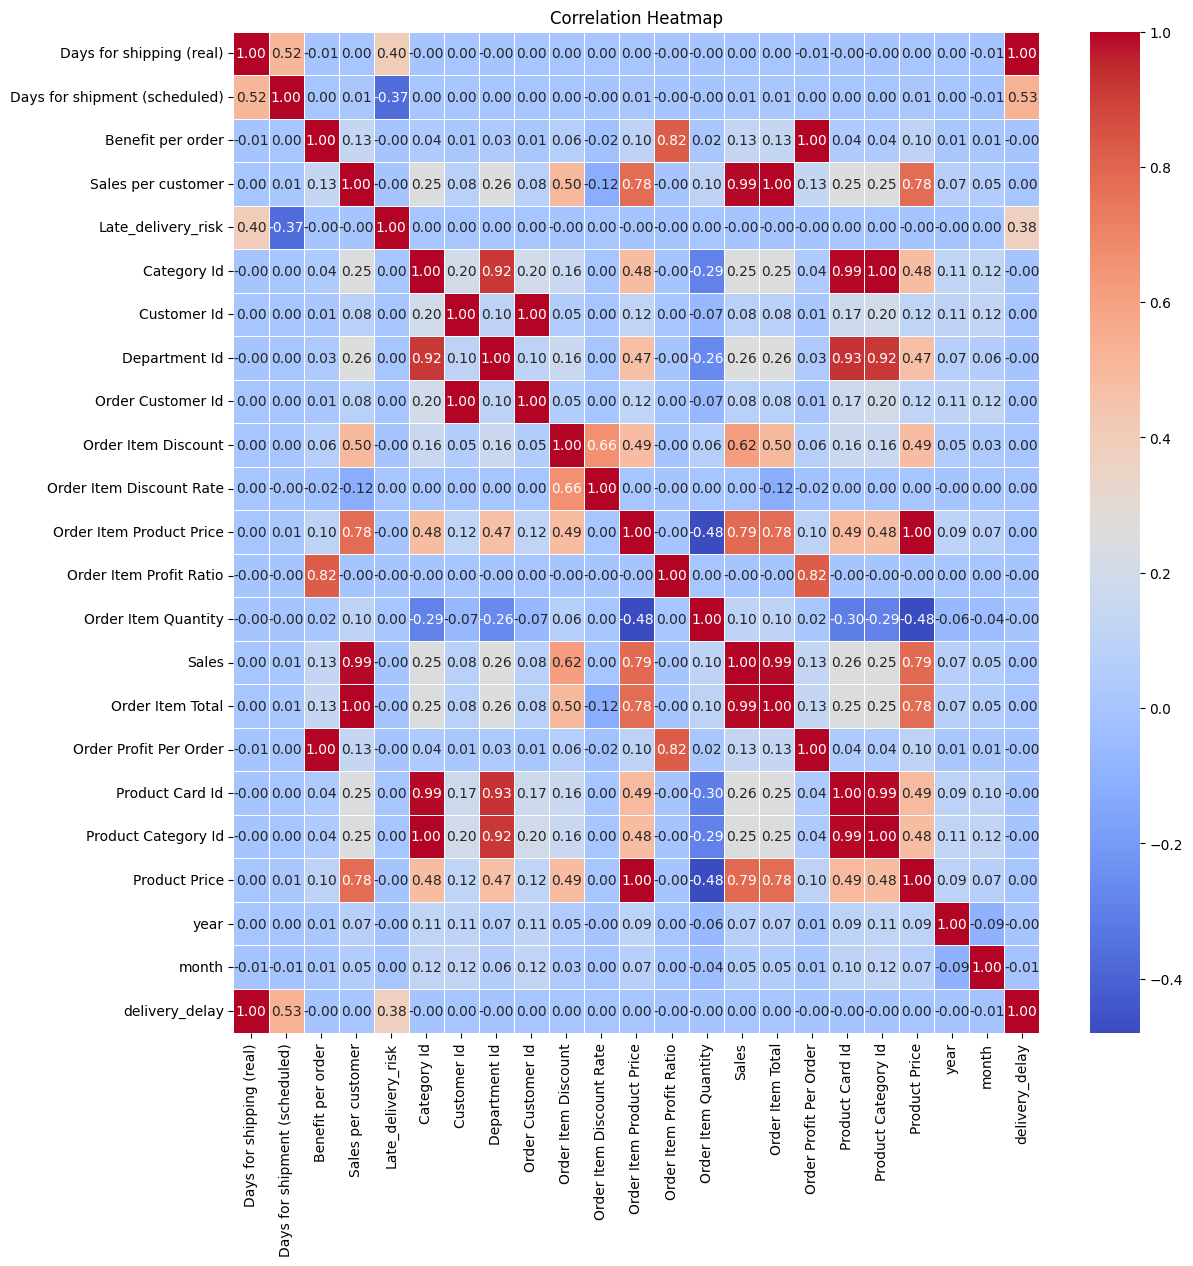

In [43]:
# heatmap to identify the importance of features that could be useful 
# use numeric_only=True, as .corr() can only take float or int 
correlation_matrix = df_filtered.corr(numeric_only=True)
plt.figure(figsize=(13, 13))  # Optional: Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


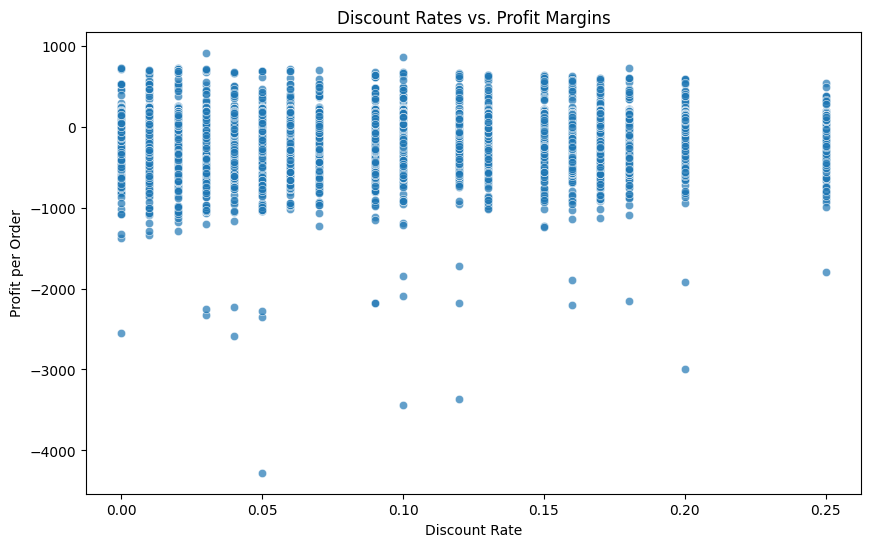

In [44]:
# Scatter plot of Discounts vs. Order Profit Per Order
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Order Item Discount Rate', y='Order Profit Per Order', alpha=0.7)
plt.title('Discount Rates vs. Profit Margins')
plt.xlabel('Discount Rate')
plt.ylabel('Profit per Order')
plt.show()

In [45]:
# Grouping by Category and Department to calculate average profits and total sales
category_stats = df_filtered.groupby('Category Name').agg(
    avg_profit=('Order Item Profit Ratio', 'mean'),
    total_sales=('Sales', 'sum')
).sort_values(by='avg_profit', ascending=False)

department_stats = df.groupby('Department Name').agg(
    avg_profit=('Order Item Profit Ratio', 'mean'),
    total_sales=('Sales', 'sum')
).sort_values(by='avg_profit', ascending=False)

print(category_stats)
print(department_stats)


                      avg_profit   total_sales
Category Name                                 
Sporting Goods          0.196483  4.752375e+04
Golf Bags & Carts       0.191475  1.036939e+04
Toys                    0.172727  2.919620e+03
Fitness Accessories     0.151230  3.560144e+04
Women's Clothing        0.148051  5.870304e+04
Soccer                  0.146522  2.647705e+04
Men's Golf Clubs        0.145618  4.703580e+04
Women's Golf Clubs      0.145580  4.454597e+04
Music                   0.141621  7.558850e+04
Garden                  0.139716  2.066410e+05
Baby                    0.139420  1.222956e+04
Baseball & Softball     0.137959  9.405715e+04
CDs                     0.135904  3.059590e+03
Consumer Electronics    0.133875  1.089913e+05
Tennis & Racquet        0.133598  4.458509e+04
Accessories             0.132433  1.336715e+05
Lacrosse                0.131429  3.946479e+04
Children's Clothing     0.129663  2.328292e+05
Hockey                  0.127964  4.836073e+04
Golf Gloves  

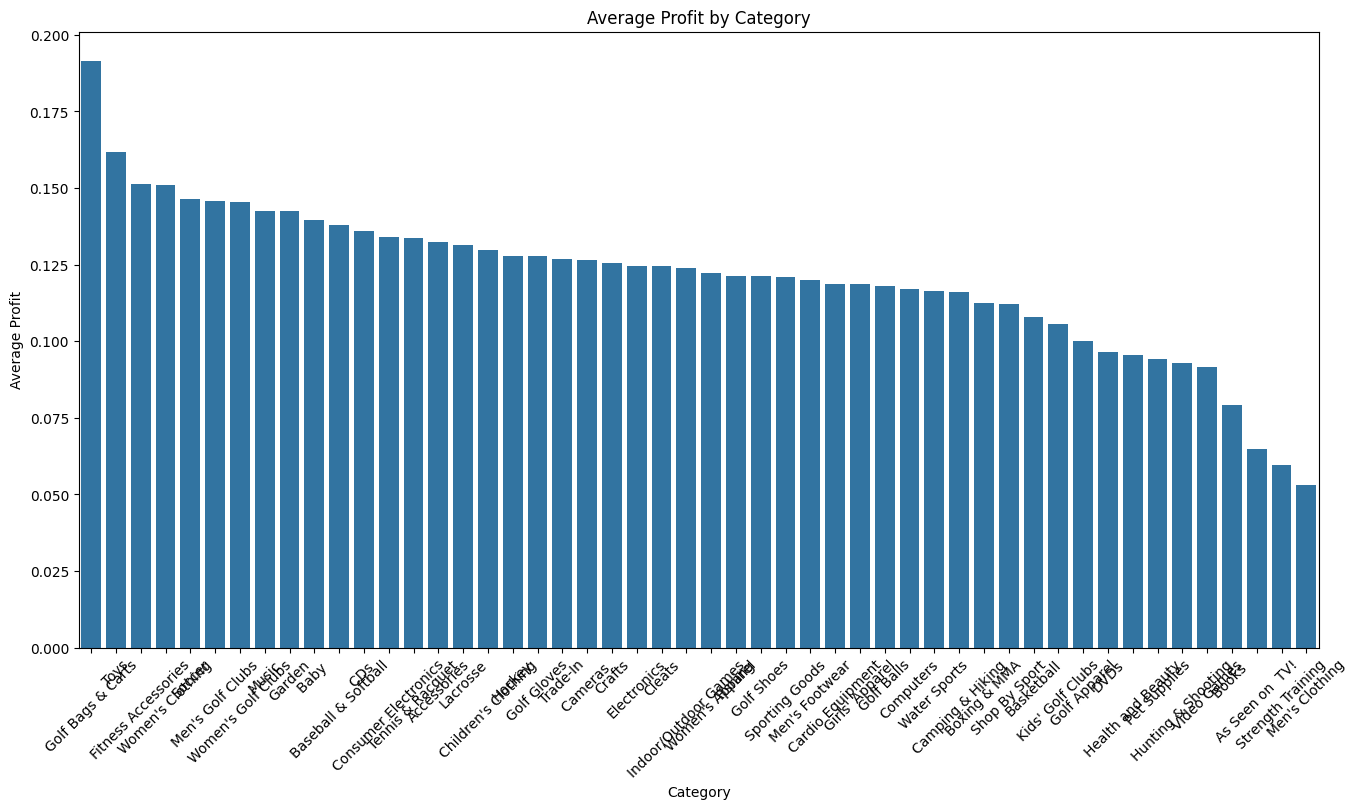

In [26]:
plt.figure(figsize=(16, 8))
sns.barplot(x=category_stats.index, y=category_stats['avg_profit'])
plt.title('Average Profit by Category')
plt.xticks(rotation=45)
plt.ylabel('Average Profit')
plt.xlabel('Category')
plt.show()


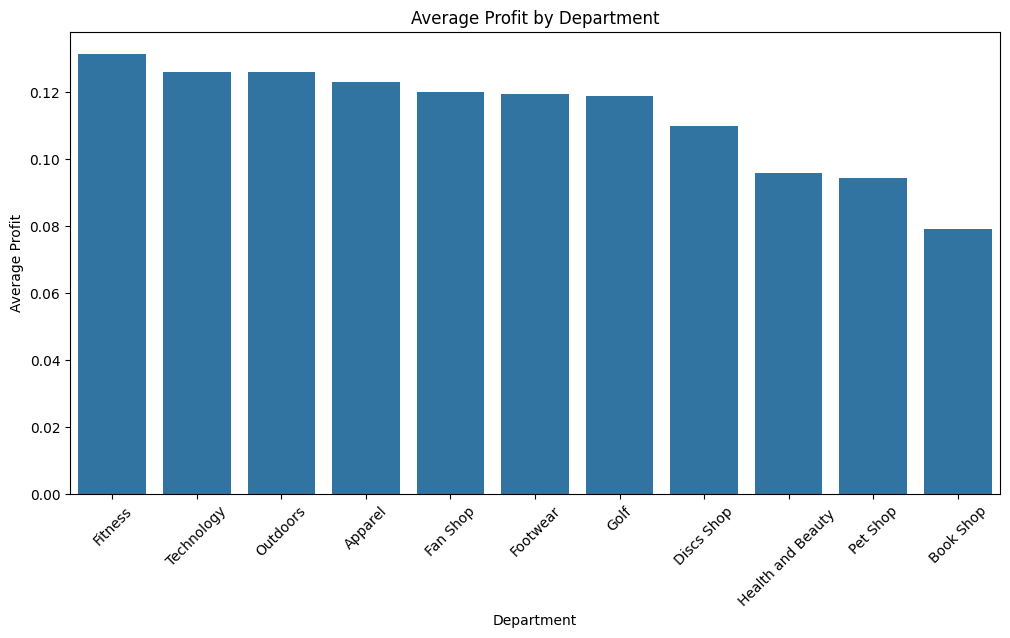

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=department_stats.index, y=department_stats['avg_profit'])
plt.title('Average Profit by Department')
plt.xticks(rotation=45)
plt.ylabel('Average Profit')
plt.xlabel('Department')
plt.show()


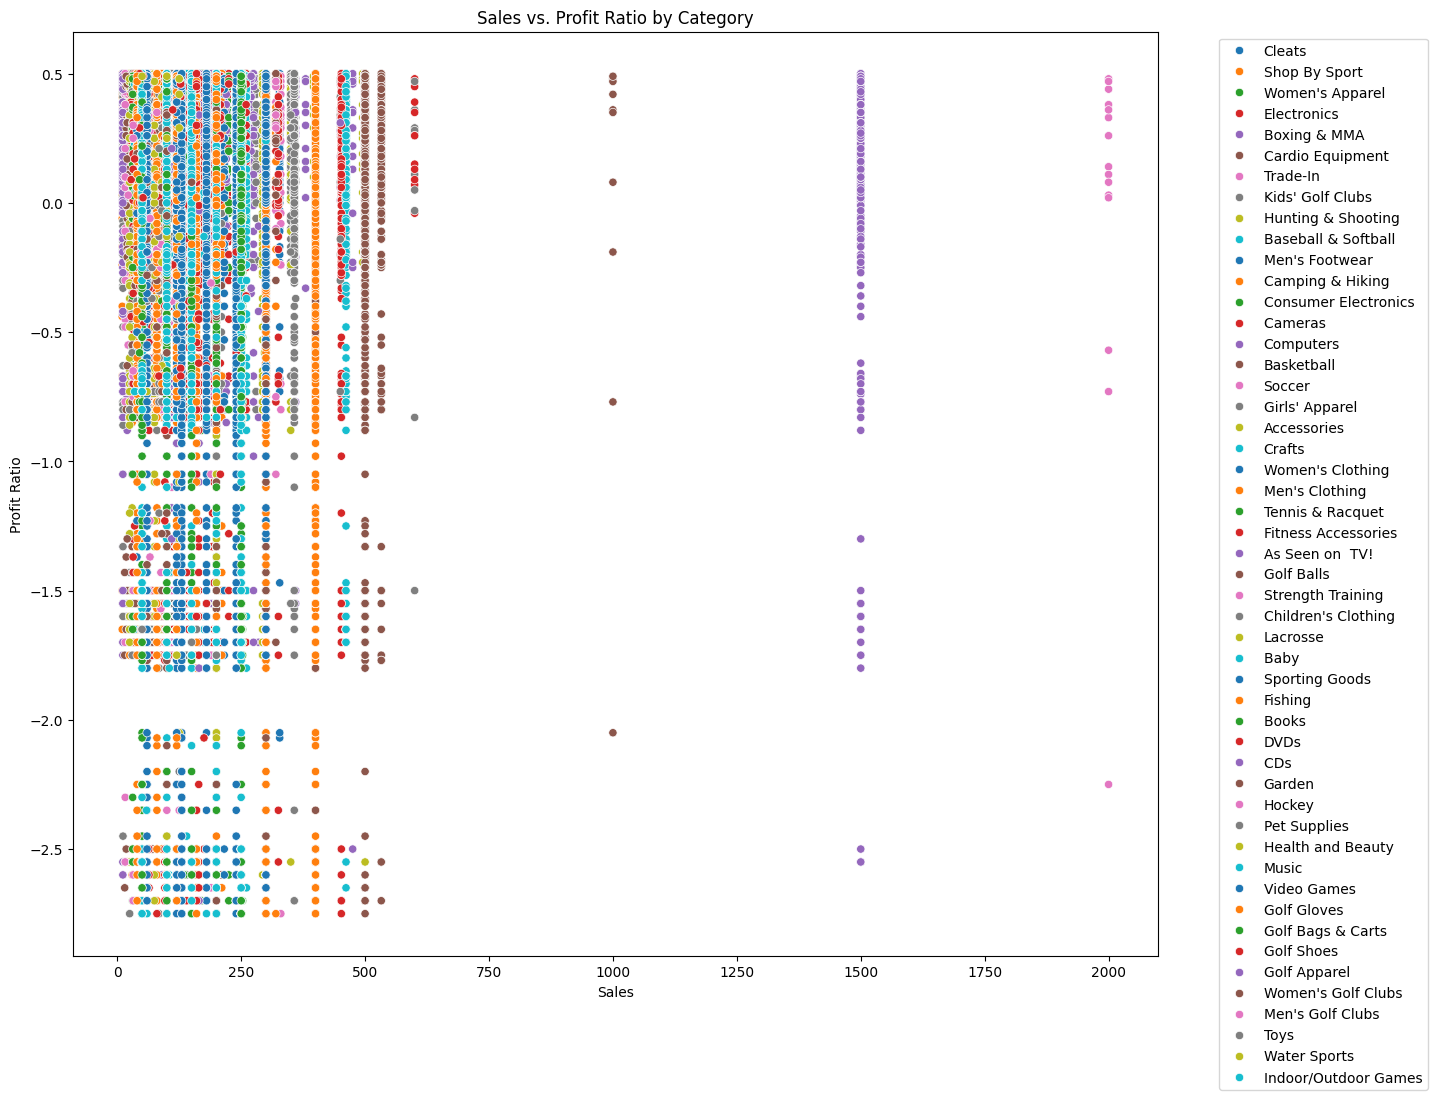

In [46]:
plt.figure(figsize=(14, 12))
sns.scatterplot(
    x='Sales', y='Order Item Profit Ratio',
    hue='Category Name', data=df_filtered, palette='tab10'
)
plt.title('Sales vs. Profit Ratio by Category')
plt.xlabel('Sales')
plt.ylabel('Profit Ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Scatterplots are used to visualize relationships between two continuous variables. They help identify:

Correlations (positive, negative, or none) between the variables.
Clusters or patterns in the data.
Outliers that deviate significantly from the general trend.
Insights from the Scatterplot:

Relationship Between Sales and Profit Ratio:

Most data points are concentrated in the lower sales range (below 500), indicating that the majority of transactions occur in low-sales scenarios.
There does not appear to be a strong linear relationship between sales and profit ratio. Higher sales do not consistently lead to higher profits.

Profit Ratio Distribution:

The profit ratio varies significantly across categories, with a large number of data points in the negative range (below 0), indicating losses for several products.
A few categories have data points with high positive profit ratios, but these are less frequent.

Outliers:

Some points in specific categories show extremely high sales (above 1000) but do not necessarily correlate with positive profit ratios.
There are categories with extremely low profit ratios (below -2), indicating significant losses, even with moderate sales.

Category-Specific Insights:

Certain categories, such as Electronics, appear to dominate the higher sales range but do not always yield proportional profits.
Categories like Books and Sporting Goods are more consistent in terms of their profit ratios, as seen from their denser clustering.

Variability Across Categories:

Some categories (e.g., Women's Apparel, Fitness Accessories) show a wide spread in both sales and profit ratios, suggesting variability in their performance.
Others (e.g., Books) are more tightly clustered, indicating more consistent sales and profits.
Business Implications:

Low Profitability Categories:

Investigate why certain categories generate negative profit ratios despite sales activity.
Reassess pricing, discounts, or supply chain costs for these categories.

High Sales but Low Profit:

Categories with high sales but low profit ratios may need optimization in costs or operational efficiency.

Consistency in Profitable Categories:

Categories with consistently positive profit ratios, such as Books, could be leveraged more in marketing or expanded further.

Target Outliers:

Study outliers (e.g., high sales with extreme losses) to understand what caused these discrepancies and avoid them in the future.

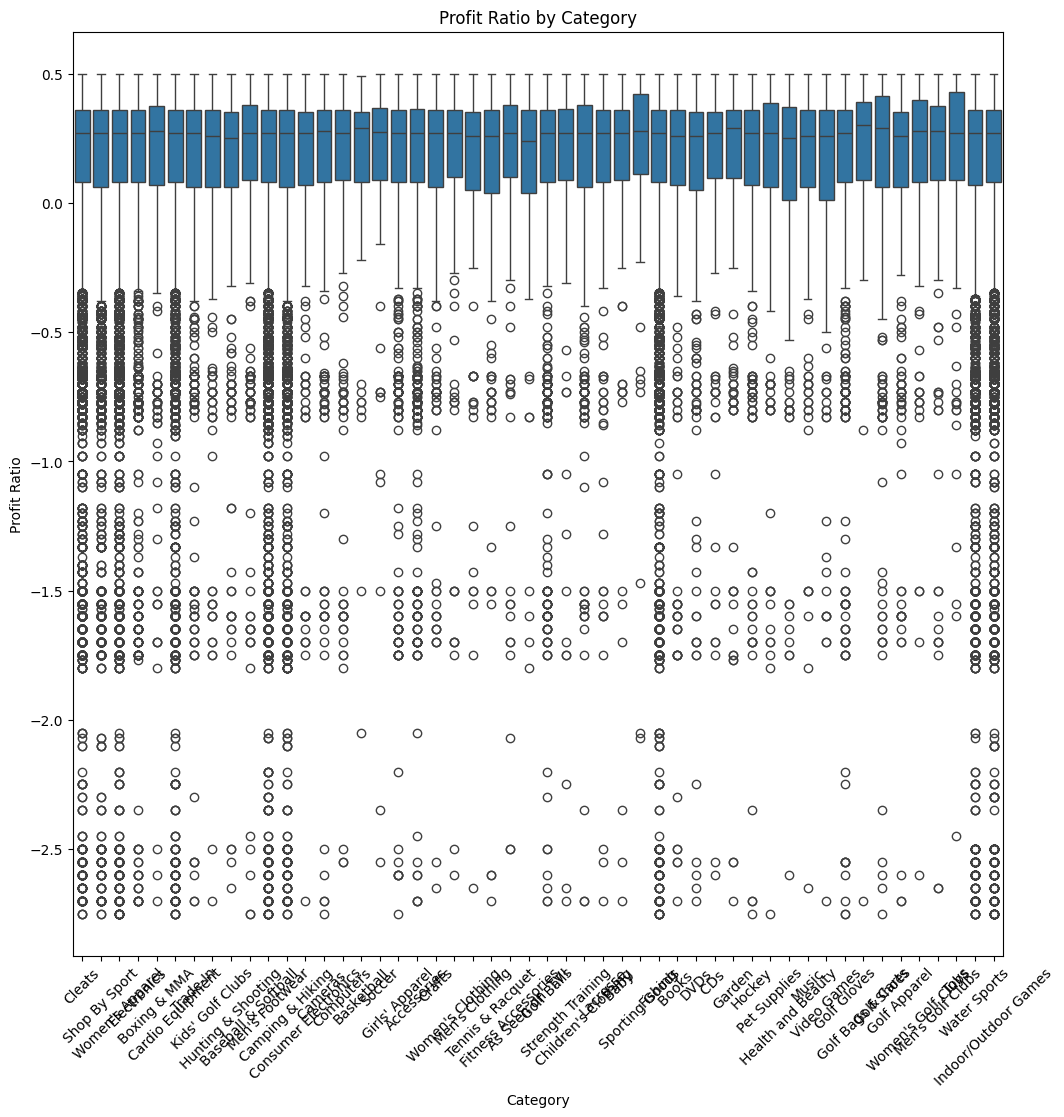

In [47]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='Category Name', y='Order Item Profit Ratio', data=df_filtered)
plt.title('Profit Ratio by Category')
plt.xticks(rotation=45)
plt.ylabel('Profit Ratio')
plt.xlabel('Category')
plt.show()


Median Profit Ratio:

Most categories have a median profit ratio around or slightly above 0, indicating that the majority of products in those categories are either marginally profitable or break even.
Profit Variability:

Some categories show a wide interquartile range (IQR), such as Children's Clothing and Women's Apparel, suggesting high variability in profit ratios within these categories.
Categories with smaller IQRs, like Books or Sporting Goods, indicate more consistent profit ratios.
Negative Profit Outliers:

Many categories have significant outliers below 0, indicating some products are generating large losses.
Categories such as Fitness Equipment and Cardio Equipment have a considerable number of negative profit ratios.
Positive Profit Outliers:

A few categories show positive outliers, indicating that certain products within these categories are exceptionally profitable.
Consistently Low-Performing Categories:

Some categories have their entire distribution skewed negatively (below 0), indicating consistent losses in these product categories.
Best and Worst Performers:

Categories with higher medians and narrower IQRs (like Books) seem to be stable and profitable.
Categories with many data points below -1.5 (such as Fitness Equipment) might require further investigation into pricing, costs, or customer demand.
Business Actions:
Focus on optimizing or reducing losses in categories with consistent negative profits, such as Cardio Equipment or Fitness Equipment.
Investigate why certain categories have a wide spread (e.g., inconsistent pricing or varying costs).
Allocate more resources to stable and profitable categories to maximize overall gains.

In [48]:
department_summary = df_filtered.groupby('Department Name')['Order Item Profit Ratio'].agg(['mean', 'median', 'std', 'count']).reset_index()
department_summary = department_summary.sort_values(by='mean', ascending=False)

print("\nDepartment Profit Summary:")
print(department_summary)


Department Profit Summary:
       Department Name      mean  median       std  count
4              Fitness  0.137014    0.27  0.447428   2267
10          Technology  0.125809    0.28  0.464653   1465
8             Outdoors  0.125492    0.27  0.462672   9590
0              Apparel  0.122716    0.27  0.464184  48589
3             Fan Shop  0.119884    0.27  0.468044  66585
5             Footwear  0.119187    0.27  0.469704  14525
6                 Golf  0.118773    0.27  0.467260  33220
2           Discs Shop  0.113273    0.26  0.460841   1265
9             Pet Shop  0.094837    0.27  0.502634    246
7   Health and Beauty   0.088745    0.25  0.476634    239
1            Book Shop  0.079062    0.26  0.555385    405


C:\Users\kohme\AppData\Local\Temp\ipykernel_31624\378869125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Department Name', y='Order Item Profit Ratio', palette='coolwarm')


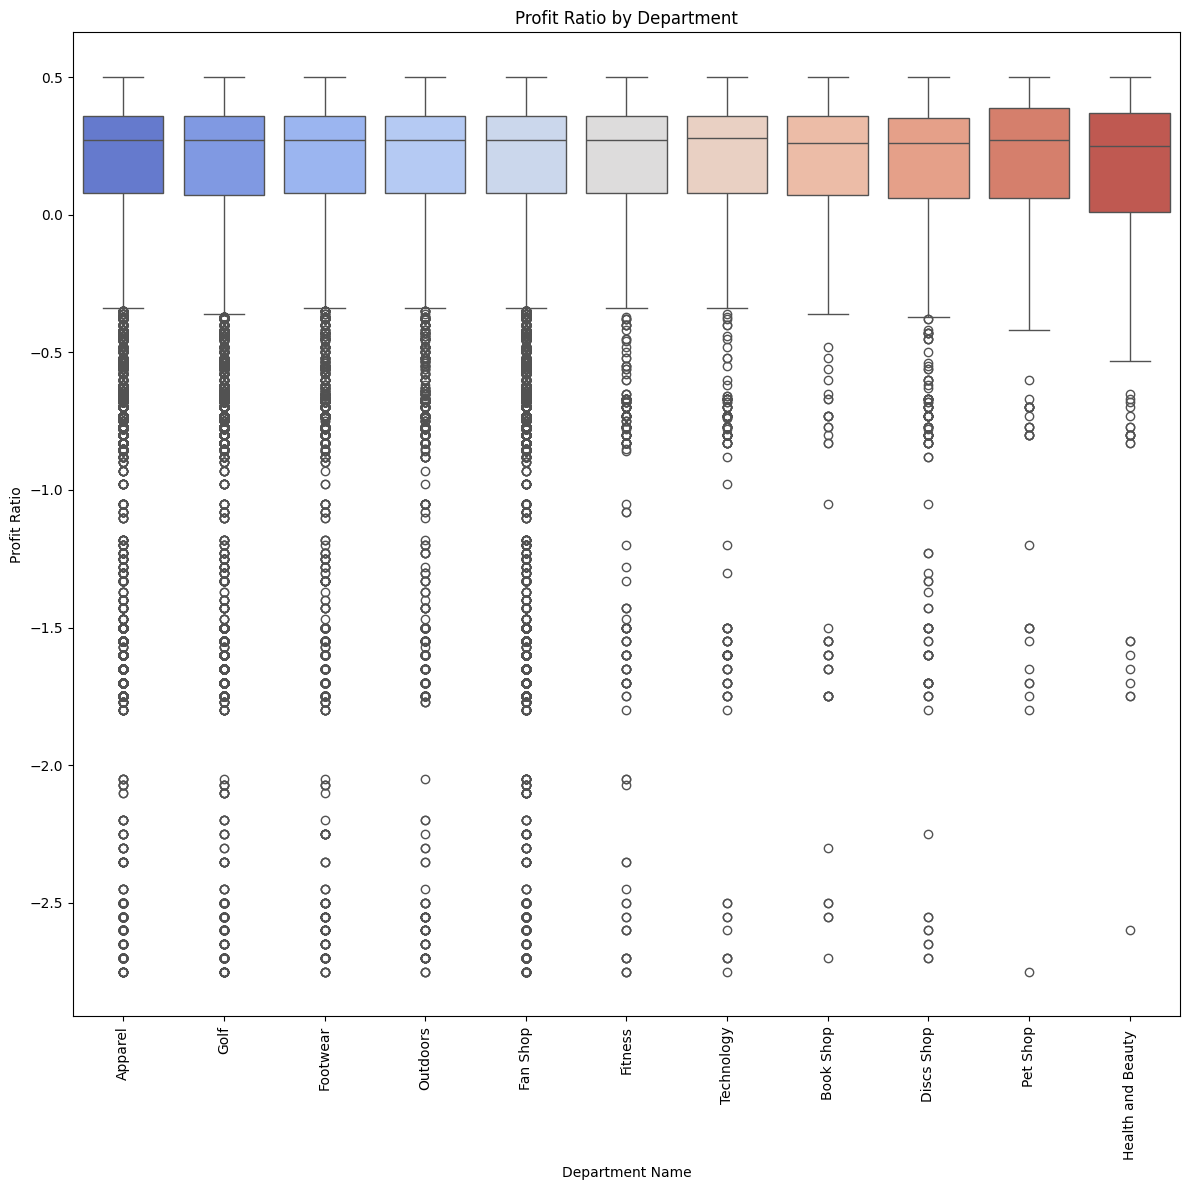

In [49]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df_filtered, x='Department Name', y='Order Item Profit Ratio', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Profit Ratio by Department')
plt.xlabel('Department Name')
plt.ylabel('Profit Ratio')
plt.tight_layout()
plt.show()


C:\Users\kohme\AppData\Local\Temp\ipykernel_31624\3183607126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=department_summary, x='Department Name', y='mean', palette='viridis')


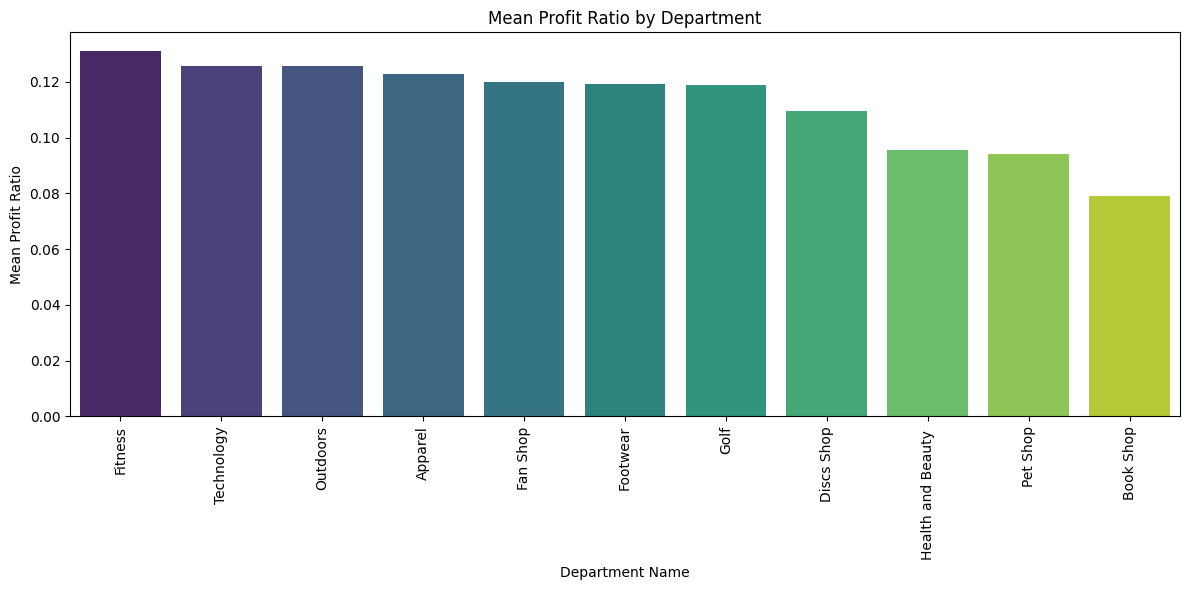

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=department_summary, x='Department Name', y='mean', palette='viridis')
plt.xticks(rotation=90)
plt.title('Mean Profit Ratio by Department')
plt.xlabel('Department Name')
plt.ylabel('Mean Profit Ratio')
plt.tight_layout()
plt.show()

C:\Users\kohme\AppData\Local\Temp\ipykernel_31624\1077669845.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


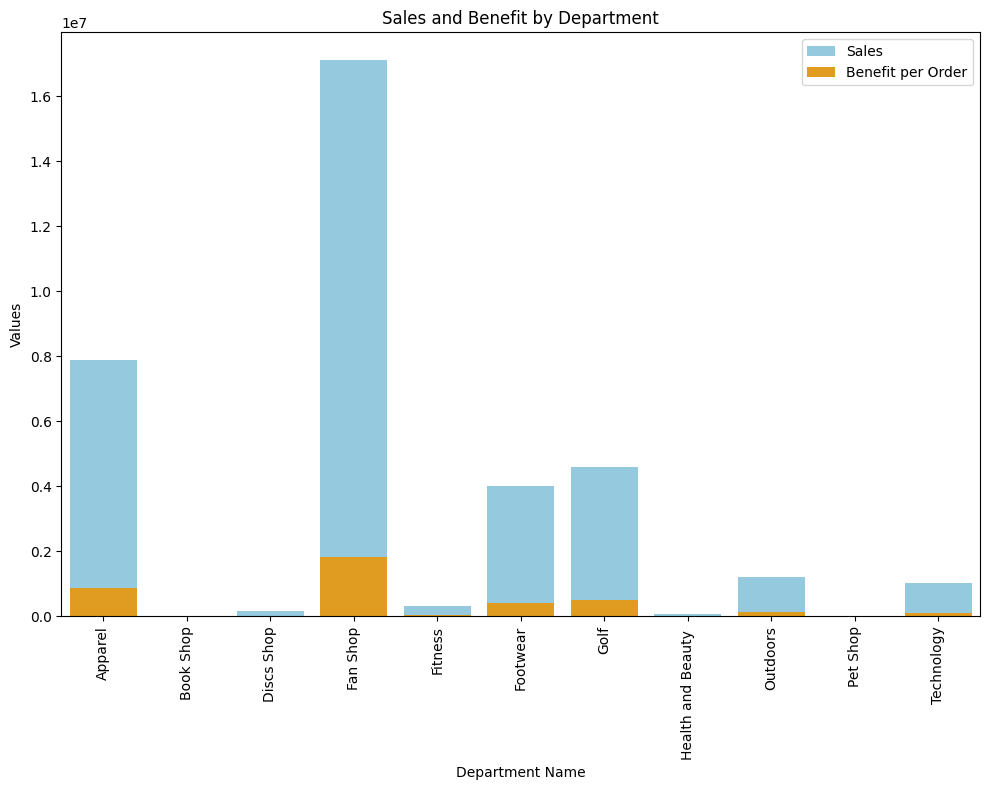


Insights:
- Departments with higher mean profit ratios are performing better overall.
- Boxplot highlights variability in profit ratios across departments.
- Sales and benefits comparison highlights departments with high sales but low profitability.


In [55]:
# Visualization 3: Sales and Benefit by Department
department_sales_benefit = df_filtered.groupby('Department Name')[['Sales', 'Benefit per order']].sum().reset_index()

# Dual bar chart: Sales vs. Benefit
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.barplot(data=department_sales_benefit, x='Department Name', y='Sales', ax=ax1, color='skyblue', label='Sales')
sns.barplot(data=department_sales_benefit, x='Department Name', y='Benefit per order', ax=ax1, color='orange', label='Benefit per Order')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Sales and Benefit by Department')
ax1.set_xlabel('Department Name')
ax1.set_ylabel('Values')
ax1.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Insights and recommendations
print("\nInsights:")
print("- Departments with higher mean profit ratios are performing better overall.")
print("- Boxplot highlights variability in profit ratios across departments.")
print("- Sales and benefits comparison highlights departments with high sales but low profitability.")

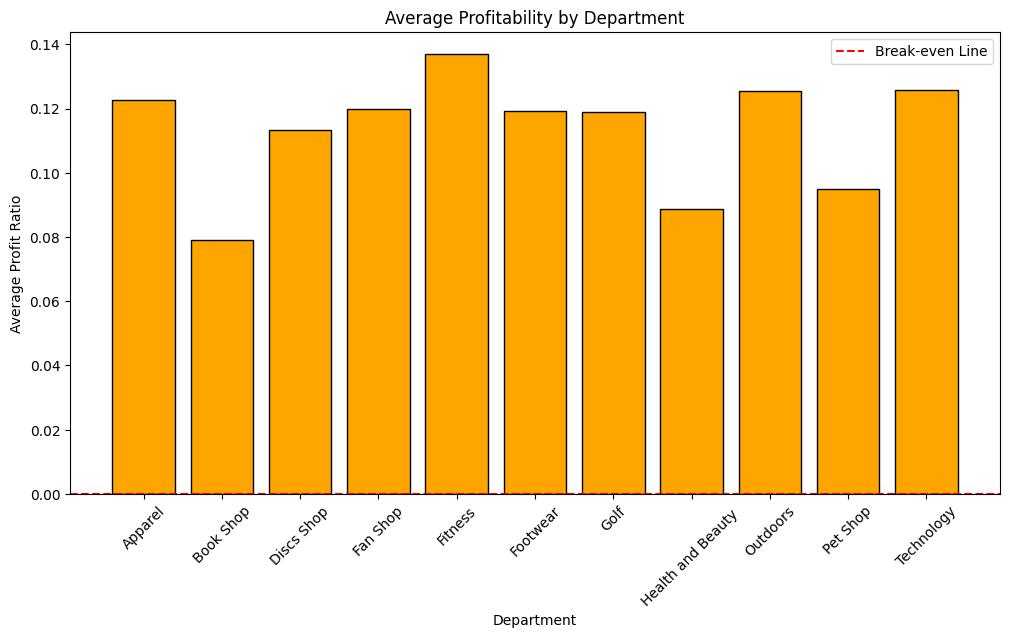

In [52]:
# Bar chart for average profitability by department
avg_profit = df_filtered.groupby('Department Name')['Order Item Profit Ratio'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_profit['Department Name'], avg_profit['Order Item Profit Ratio'], color='orange', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', label='Break-even Line')
plt.xticks(rotation=45)
plt.title('Average Profitability by Department')
plt.xlabel('Department')
plt.ylabel('Average Profit Ratio')
plt.legend()
plt.show()


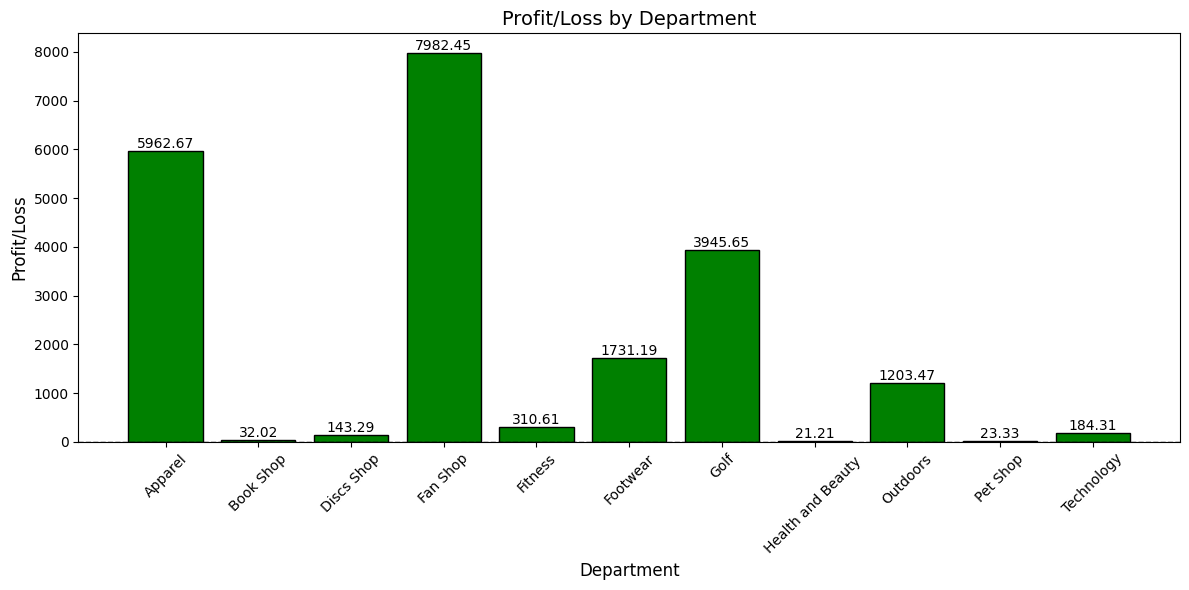

In [54]:

# Example data
profit_data = df_filtered.groupby('Department Name')['Order Item Profit Ratio'].sum().reset_index()
departments = profit_data['Department Name']
profit_values = profit_data['Order Item Profit Ratio']

# Create the bar graph
plt.figure(figsize=(12, 6))
colors = ['green' if val > 0 else 'red' for val in profit_values]  # Positive: Green, Negative: Red
bars = plt.bar(departments, profit_values, color=colors, edgecolor='black')

# Add a horizontal line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Add labels and title
plt.title('Profit/Loss by Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Profit/Loss', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Annotate values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom' if yval > 0 else 'top')

plt.show()


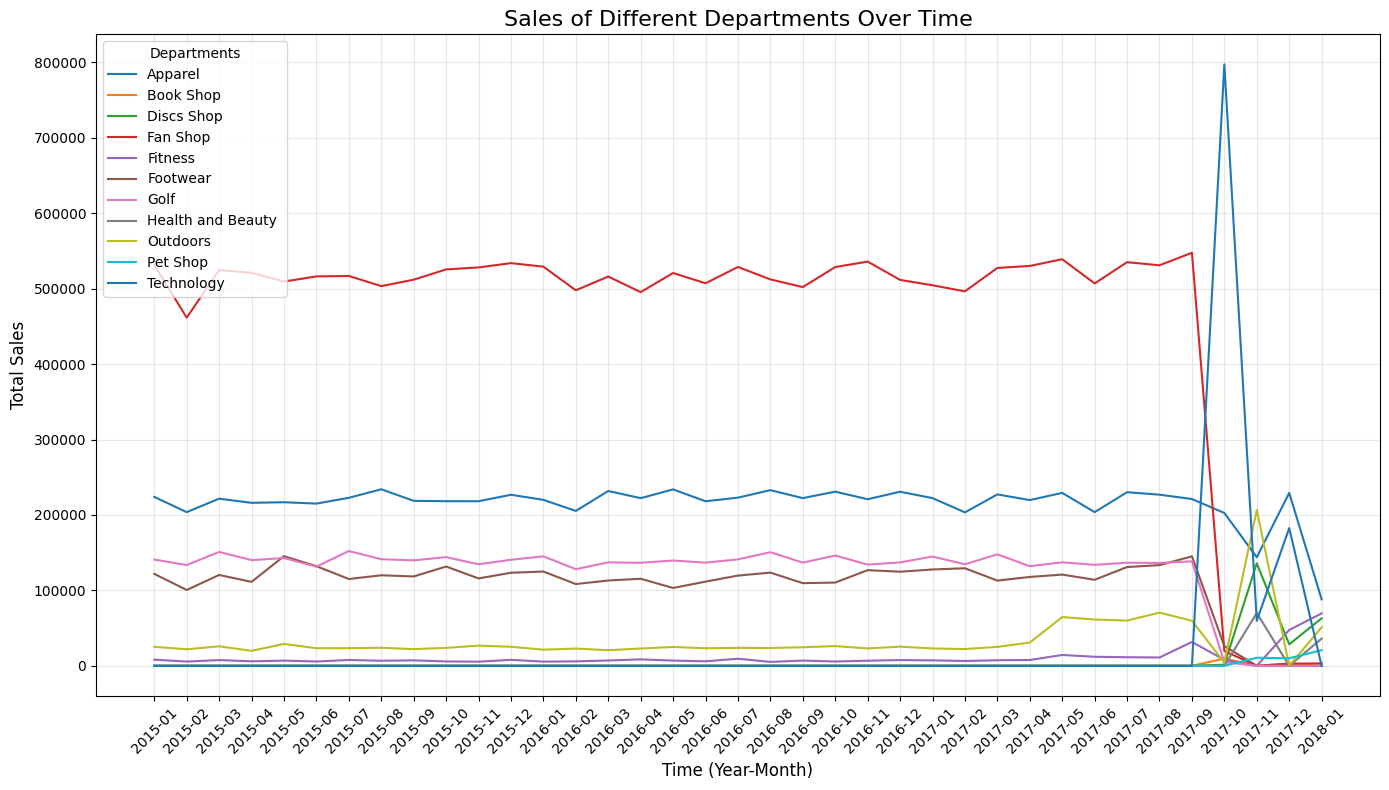

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'order_date' column to datetime if not already
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year and month for grouping
df['YearMonth'] = df['order_date'].dt.to_period('M')  # Combines year and month into YYYY-MM format

# Group sales data by Department and YearMonth
sales_over_time = df.groupby(['Department Name', 'YearMonth'])['Sales'].sum().reset_index()

# Convert 'YearMonth' from Period to string for plotting
sales_over_time['YearMonth'] = sales_over_time['YearMonth'].astype(str)

# Pivot the data to have departments as columns
sales_pivot = sales_over_time.pivot(index='YearMonth', columns='Department Name', values='Sales').fillna(0)

# Plotting the sales trends
plt.figure(figsize=(14, 8))
for department in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[department], label=department)

# Formatting the plot
plt.title('Sales of Different Departments Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(loc='upper left', title='Departments', fontsize=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


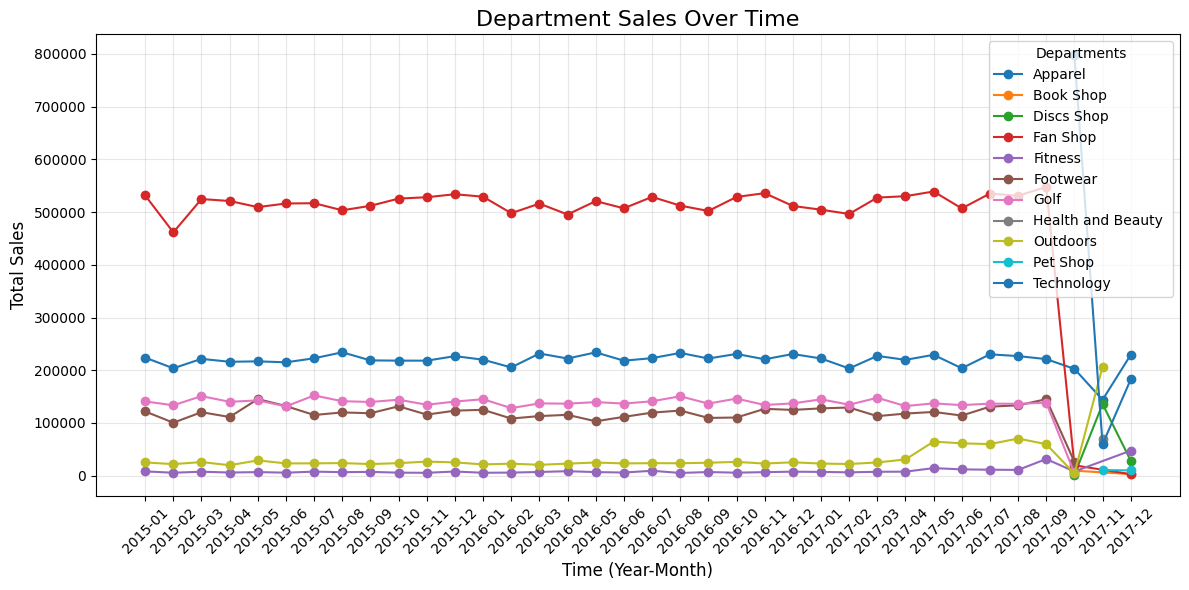

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Keep only relevant columns
cleaned_data = df_filtered[['Customer Segment', 'Department Name', 'Sales', 'order_date']].copy()

# Convert 'order_date' to datetime and remove invalid dates
cleaned_data['order_date'] = pd.to_datetime(cleaned_data['order_date'], errors='coerce')
cleaned_data = cleaned_data.dropna(subset=['order_date'])

# Extract YearMonth for grouping
cleaned_data['YearMonth'] = cleaned_data['order_date'].dt.to_period('M')  # Combine year and month

# Group sales data by Department and YearMonth
department_sales_over_time = (
    cleaned_data.groupby(['Department Name', 'YearMonth'])['Sales']
    .sum()
    .reset_index()
)

# Convert 'YearMonth' to string for plotting
department_sales_over_time['YearMonth'] = department_sales_over_time['YearMonth'].astype(str)

# Filter for a specific Customer Segment (optional)
# cleaned_data = cleaned_data[cleaned_data['Customer Segment'] == 'Consumer']  # Example filter

# Plotting department sales over time
plt.figure(figsize=(12, 6))

# Loop through unique departments to plot individual lines
for department in department_sales_over_time['Department Name'].unique():
    department_data = department_sales_over_time[
        department_sales_over_time['Department Name'] == department
    ]
    plt.plot(
        department_data['YearMonth'],
        department_data['Sales'],
        marker='o',
        label=department,
    )

# Formatting the plot
plt.title('Department Sales Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10, title="Departments")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\kohme\AppData\Local\Temp\ipykernel_31624\3639486535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date'])
C:\Users\kohme\AppData\Local\Temp\ipykernel_31624\3639486535.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YearMonth'] = df_filtered['order_date'].dt.to_period('M')  # Combines year and month into YYYY-MM format


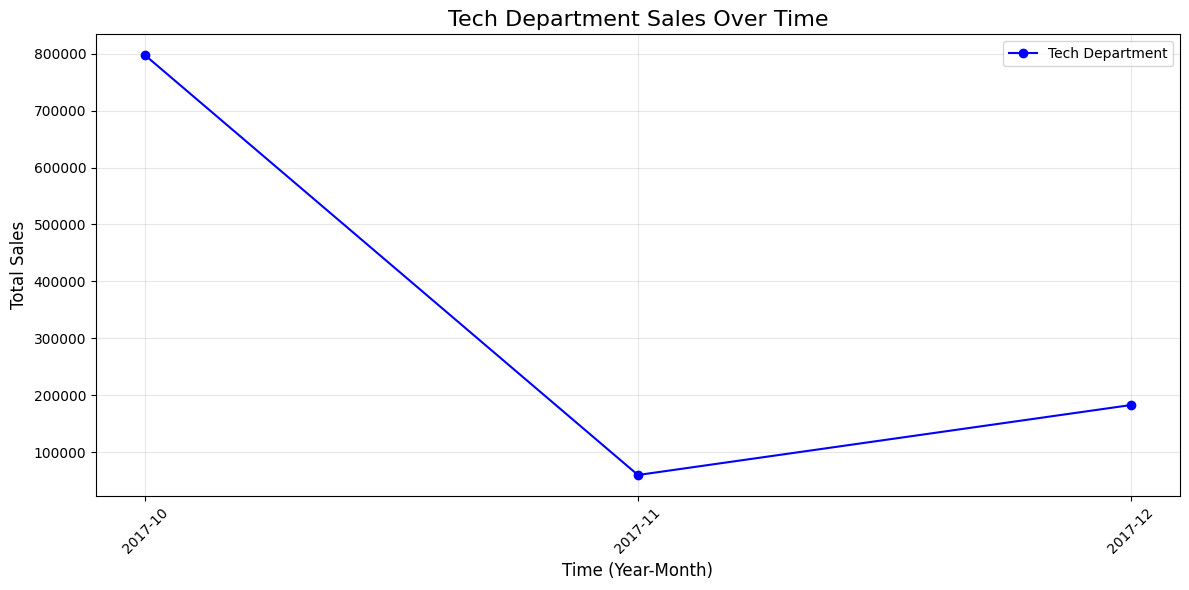

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'order_date' is in datetime format
df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date'])

# Extract year and month for grouping
df_filtered['YearMonth'] = df_filtered['order_date'].dt.to_period('M')  # Combines year and month into YYYY-MM format

# Filter for the Tech department
tech_data = df_filtered[df_filtered['Department Name'] == 'Technology']

# Group sales data by YearMonth
tech_sales_over_time = tech_data.groupby('YearMonth')['Sales'].sum().reset_index()

# Convert 'YearMonth' from Period to string for plotting
tech_sales_over_time['YearMonth'] = tech_sales_over_time['YearMonth'].astype(str)

# Plotting the sales trends for the Tech department
plt.figure(figsize=(12, 6))
plt.plot(tech_sales_over_time['YearMonth'], tech_sales_over_time['Sales'], marker='o', color='blue', label='Tech Department')

# Formatting the plot
plt.title('Tech Department Sales Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()
